In [1]:
#Libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tabulate import tabulate
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\cust_segm.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Checking for null values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df= df.drop(columns=['CUST_ID'])

In [7]:
#Hapus nilai null pada credit_limit
df.dropna(subset=['CREDIT_LIMIT'], inplace= True)
#Imputasi nilai null pada Minimum Payments
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
#Cek nilai null lagi
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


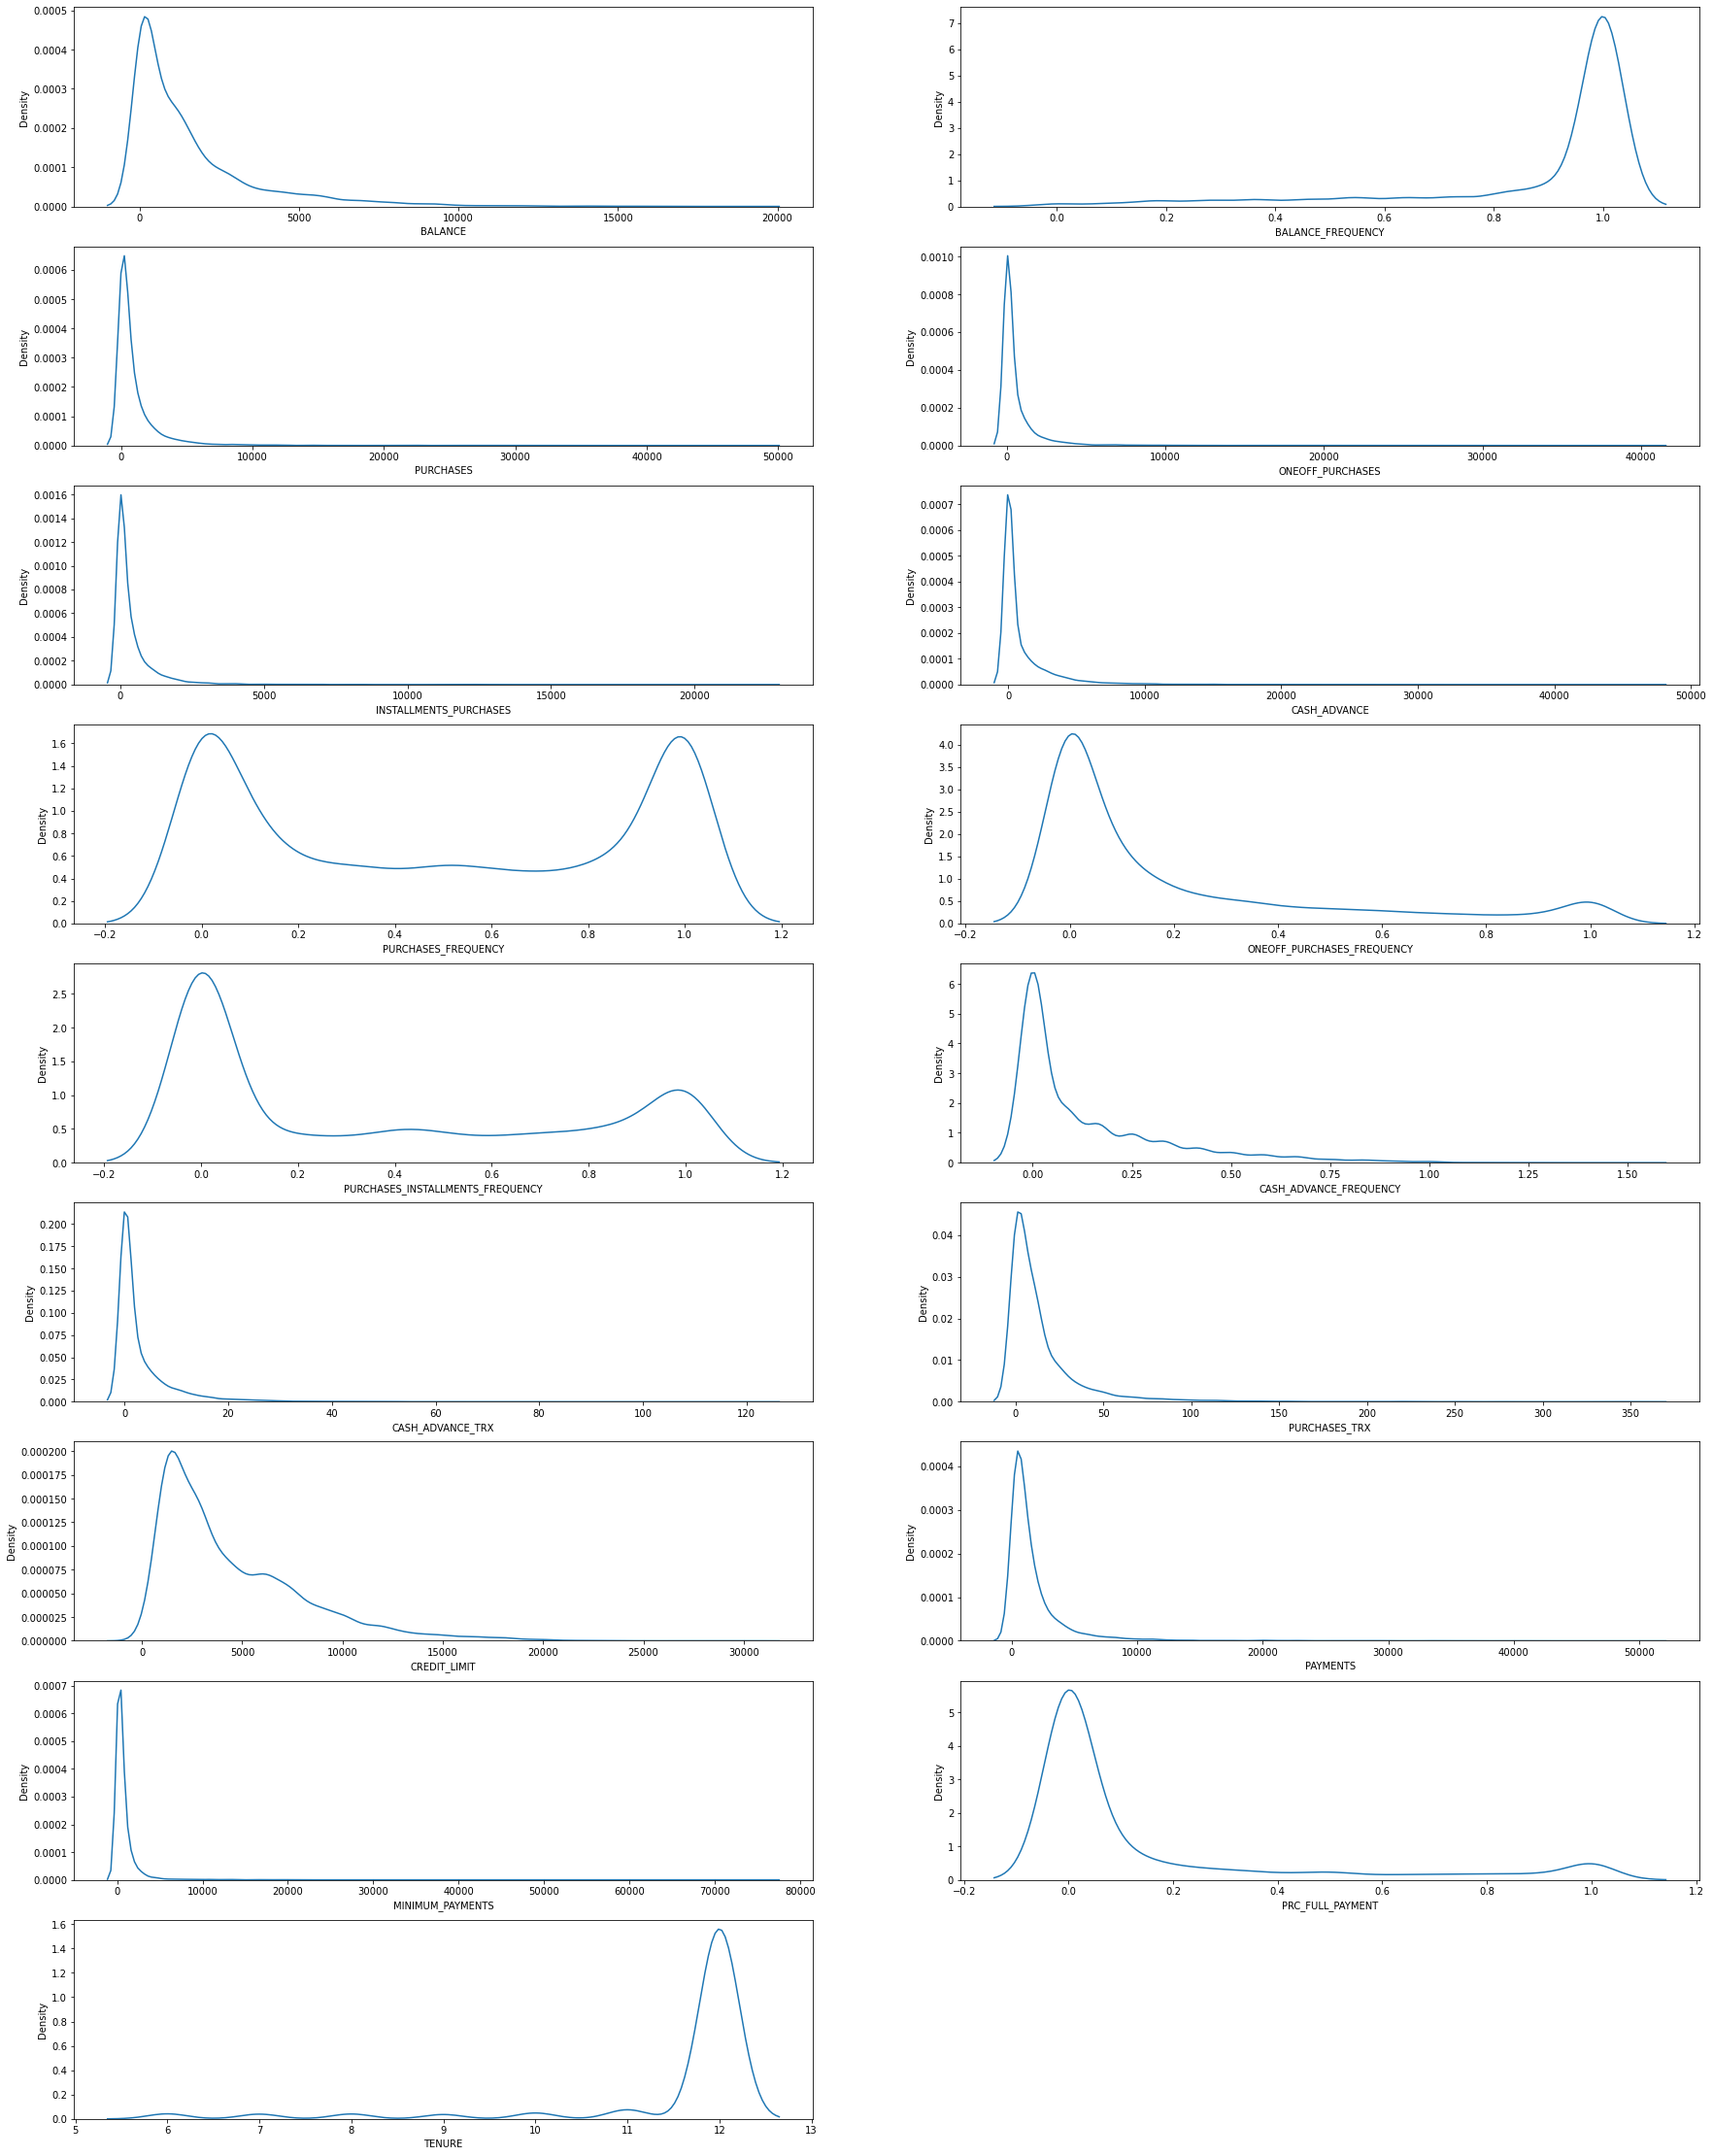

In [9]:
#Memodelkan distribusi dari masing-masing variabel
plt.figure(figsize=(30,40))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

In [39]:
def summary(data: pd.DataFrame, x: str):
    '''
    The function prints the 5 point summary and histogram, box plot, 
    violin plot, and cumulative density distribution plots for each 
    feature name passed as the argument.
    
    Parameters:
    ----------
    
    data: pd.Datafraame, the dataset
    x: str, feature name
    
    Usage:
    ------------
    
    summary(data, 'age')
    '''
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    dict={'Min': x_min, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Max': x_max}
    df = pd.DataFrame(data=dict, index=['Value'])
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n')
    print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color = 'purple')
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Payments Attribute:

+-------+-------+---------+---------+---------+---------+
|       |   Min |      Q1 |      Q2 |      Q3 |     Max |
|-------+-------+---------+---------+---------+---------|
| Value |     0 | 383.283 | 857.063 | 1901.28 | 50721.5 |
+-------+-------+---------+---------+---------+---------+


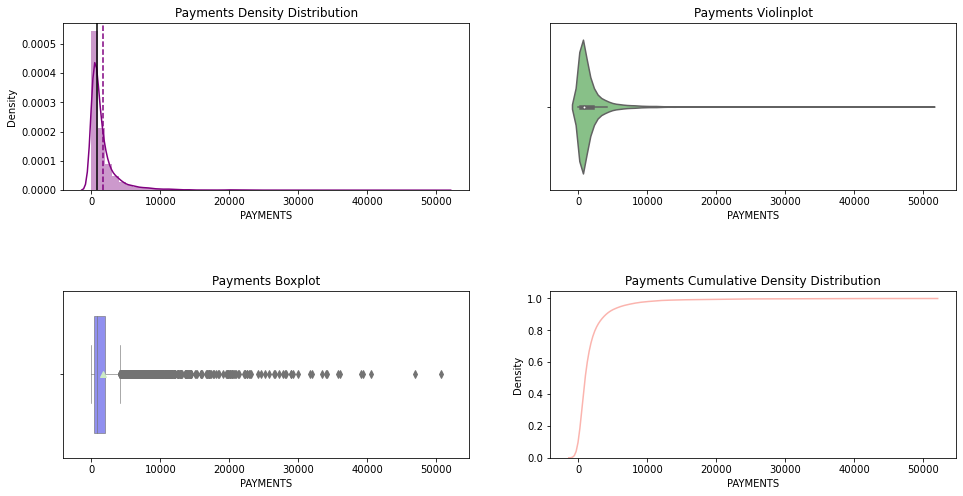

In [74]:
summary(df, 'PAYMENTS')

5 Point Summary of Balance Attribute:

+-------+-------+---------+--------+---------+---------+
|       |   Min |      Q1 |     Q2 |      Q3 |     Max |
|-------+-------+---------+--------+---------+---------|
| Value |     0 | 128.366 | 873.68 | 2054.37 | 19043.1 |
+-------+-------+---------+--------+---------+---------+


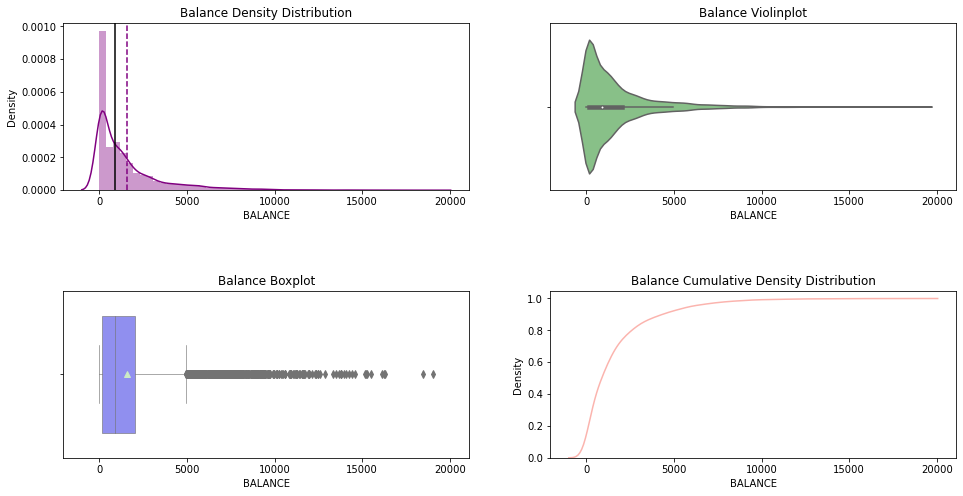

In [40]:
summary (df, "BALANCE")

5 Point Summary of Purchases Attribute:

+-------+-------+------+--------+---------+---------+
|       |   Min |   Q1 |     Q2 |      Q3 |     Max |
|-------+-------+------+--------+---------+---------|
| Value |     0 | 39.8 | 361.49 | 1110.17 | 49039.6 |
+-------+-------+------+--------+---------+---------+


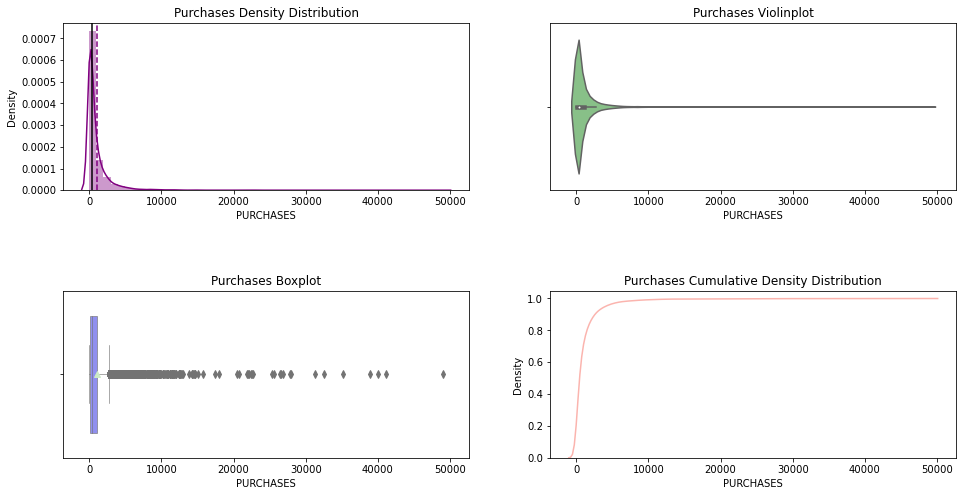

In [59]:
summary (df, "PURCHASES")

5 Point Summary of Oneoff_purchases Attribute:

+-------+-------+------+------+--------+---------+
|       |   Min |   Q1 |   Q2 |     Q3 |     Max |
|-------+-------+------+------+--------+---------|
| Value |     0 |    0 |   38 | 577.83 | 40761.2 |
+-------+-------+------+------+--------+---------+


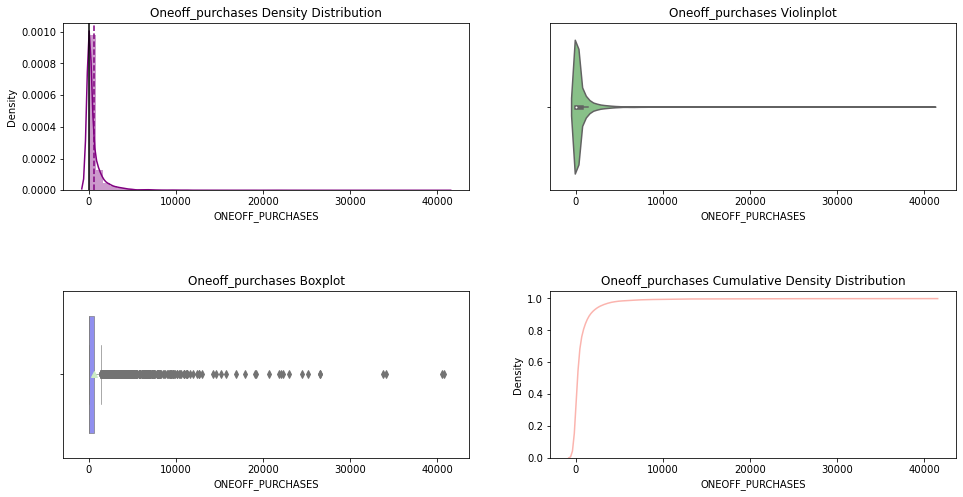

In [61]:
summary (df, "ONEOFF_PURCHASES")

5 Point Summary of Installments_purchases Attribute:

+-------+-------+------+------+--------+-------+
|       |   Min |   Q1 |   Q2 |     Q3 |   Max |
|-------+-------+------+------+--------+-------|
| Value |     0 |    0 |   89 | 468.65 | 22500 |
+-------+-------+------+------+--------+-------+


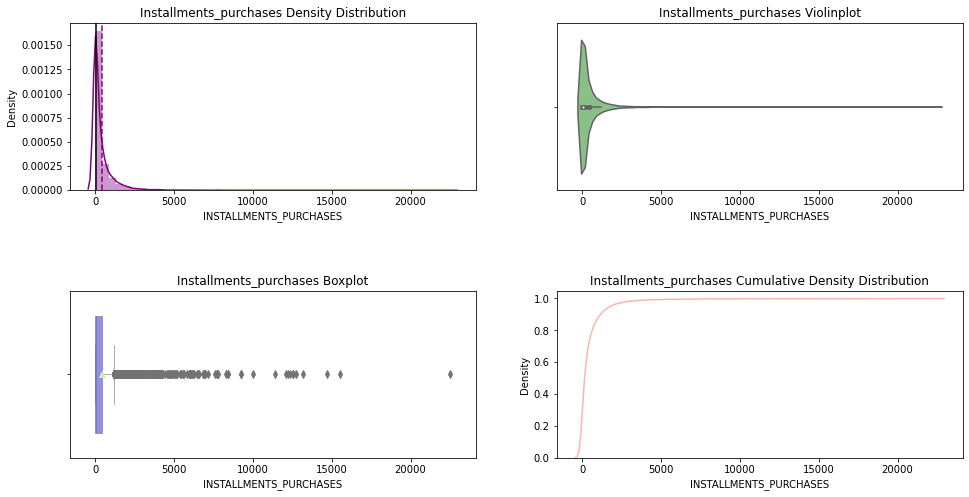

In [64]:
summary (df, "INSTALLMENTS_PURCHASES")

5 Point Summary of Cash_advance Attribute:

+-------+-------+------+------+---------+---------+
|       |   Min |   Q1 |   Q2 |      Q3 |     Max |
|-------+-------+------+------+---------+---------|
| Value |     0 |    0 |    0 | 1113.87 | 47137.2 |
+-------+-------+------+------+---------+---------+


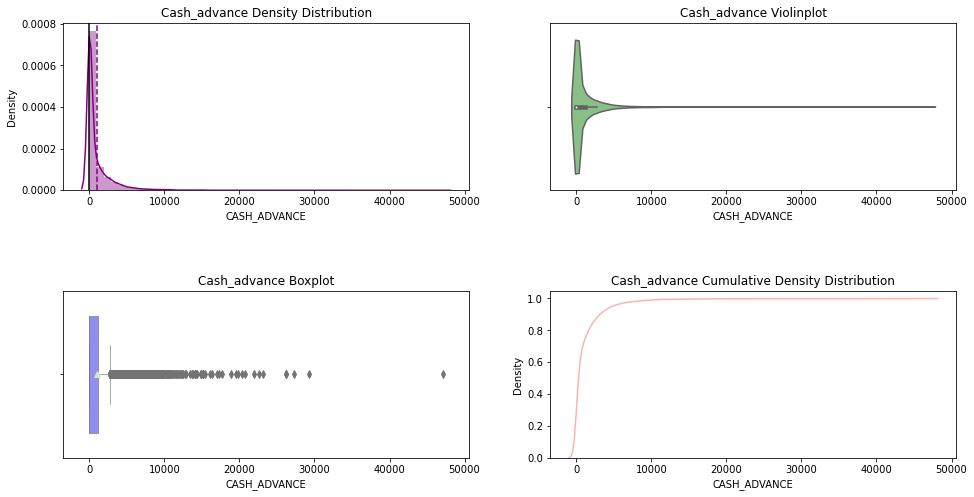

In [65]:
summary (df, "CASH_ADVANCE")

5 Point Summary of Credit_limit Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    50 | 1600 | 3000 | 6500 | 30000 |
+-------+-------+------+------+------+-------+


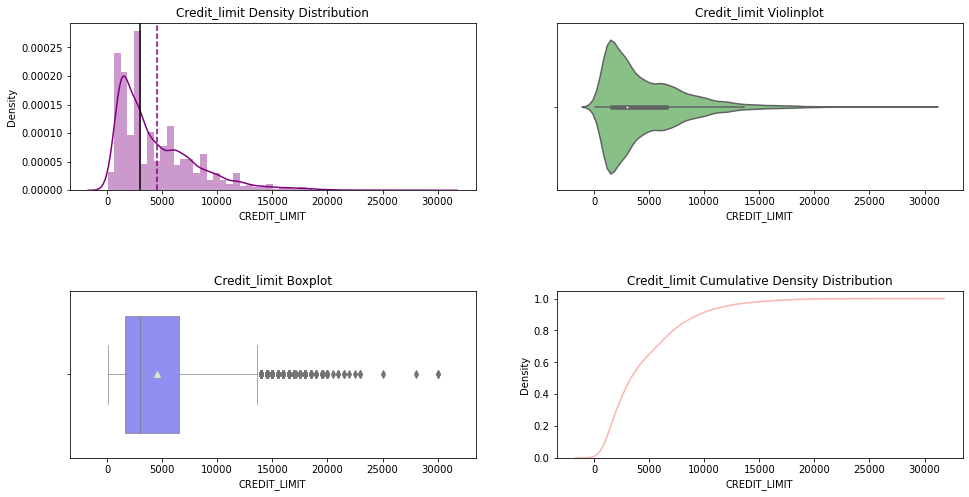

In [66]:
summary (df, "CREDIT_LIMIT")

In [10]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 3))
    else:
        plt.figure(figsize=(n + 1, 3))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

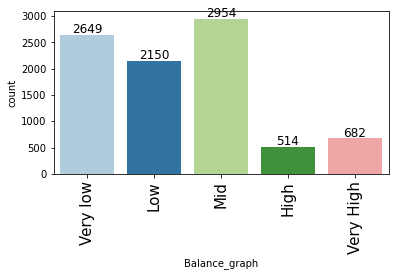

In [11]:
df['Balance_graph']=pd.cut(df['BALANCE'], bins=[0,200,	1000,	3500, 	5000,	20000]
                                ,labels=['Very low', 'Low', 'Mid', 'High','Very High'], include_lowest=True)


labeled_barplot(df, 'Balance_graph')

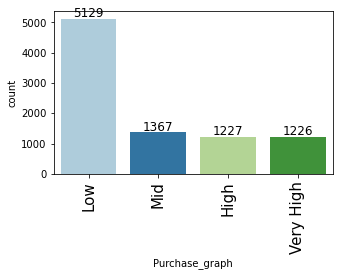

In [75]:
df['Purchase_graph']=pd.cut(df['PURCHASES'], bins=[0,500,	1000,	2000, 	50000]
                                ,labels=['Low', 'Mid', 'High', 'Very High'], include_lowest=True)
labeled_barplot(df, 'Purchase_graph')

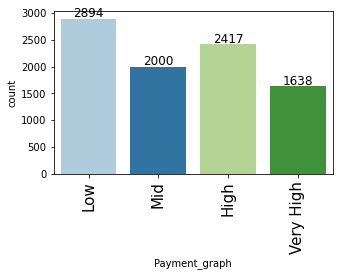

In [76]:
df['Payment_graph']=pd.cut(df['PAYMENTS'], bins=[0,500,	1000,	2500, 	60000]
                                ,labels=['Low', 'Mid', 'High', 'Very High'], include_lowest=True)
labeled_barplot(df, 'Payment_graph')

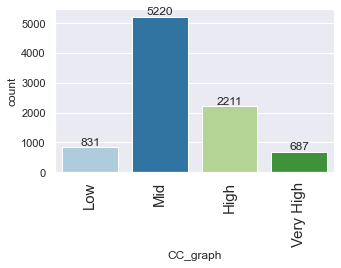

In [41]:
df['CC_graph']=pd.cut(df['CREDIT_LIMIT'], bins=[0,	1000,	5000, 	10000,	60000]
                                ,labels=['Low', 'Mid', 'High', 'Very High'], include_lowest=True)
labeled_barplot(df, 'CC_graph')

In [12]:
df1= df.drop(columns=['Balance_graph'])

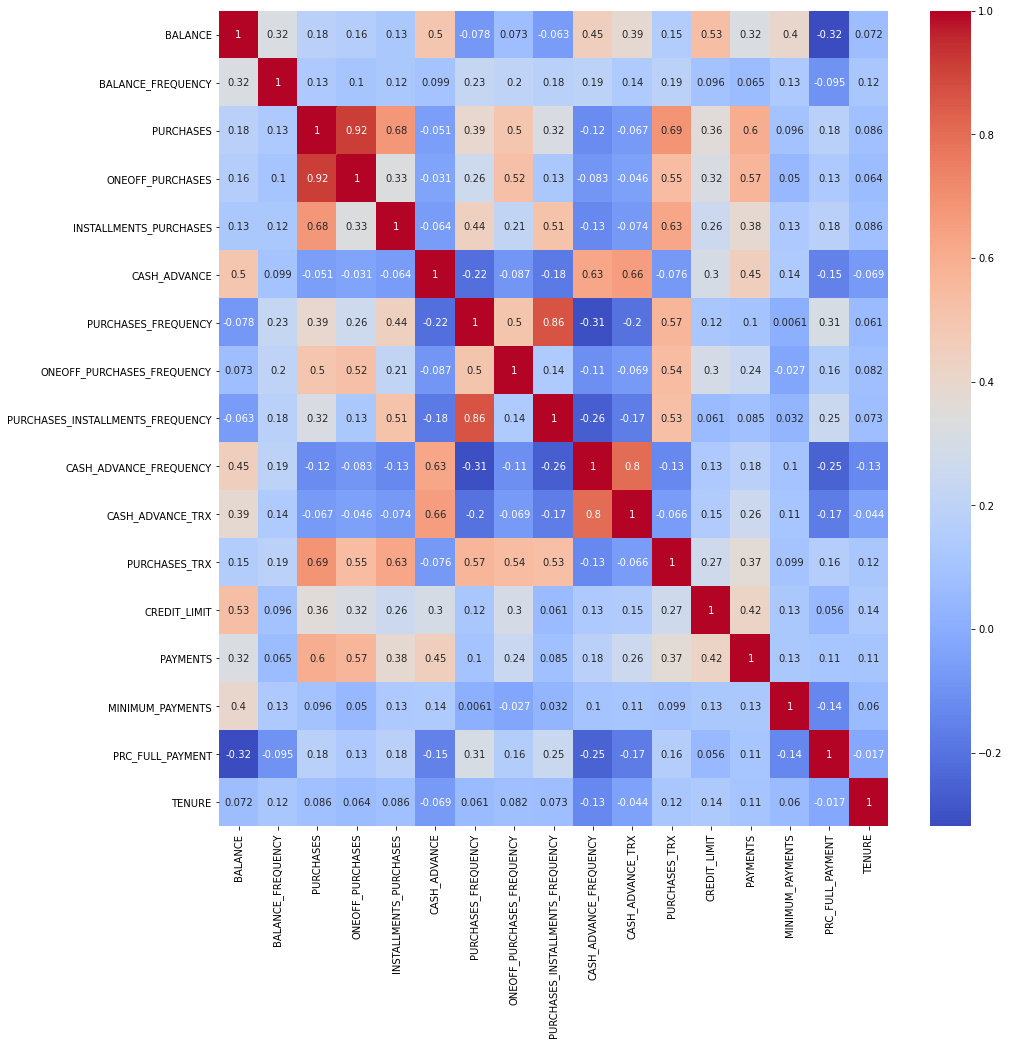

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

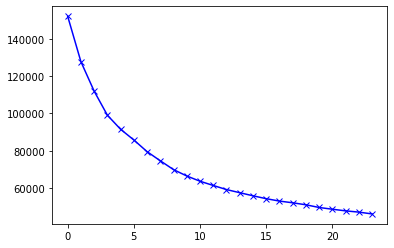

In [14]:
X = np.asarray(df1)
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape
n_clusters=25
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_) 
plt.plot(cost, 'bx-')

In [15]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    df1[Range]=0        
    df1.loc[((df1[c]>0)&(df1[c]<=500)),Range]=1
    df1.loc[((df1[c]>500)&(df1[c]<=1000)),Range]=2
    df1.loc[((df1[c]>1000)&(df1[c]<=3000)),Range]=3
    df1.loc[((df1[c]>3000)&(df1[c]<=5000)),Range]=4
    df1.loc[((df1[c]>5000)&(df1[c]<=10000)),Range]=5
    df1.loc[((df1[c]>10000)),Range]=6

In [16]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df1[Range]=0
    df1.loc[((df1[c]>0)&(df1[c]<=0.1)),Range]=1
    df1.loc[((df1[c]>0.1)&(df1[c]<=0.3)),Range]=2
    df1.loc[((df1[c]>0.3)&(df1[c]<=0.5)),Range]=3
    df1.loc[((df1[c]>0.5)&(df1[c]<=0.7)),Range]=4
    df1.loc[((df1[c]>0.7)&(df1[c]<=0.9)),Range]=5
    df1.loc[((df1[c]>0.9)&(df1[c]<=1)),Range]=6

In [17]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    df1[Range]=0
    df1.loc[((df1[c]>0)&(df1[c]<=5)),Range]=1
    df1.loc[((df1[c]>5)&(df1[c]<=10)),Range]=2
    df1.loc[((df1[c]>10)&(df1[c]<=15)),Range]=3
    df1.loc[((df1[c]>15)&(df1[c]<=20)),Range]=4
    df1.loc[((df1[c]>20)&(df1[c]<=30)),Range]=5
    df1.loc[((df1[c]>30)&(df1[c]<=50)),Range]=6
    df1.loc[((df1[c]>50)&(df1[c]<=100)),Range]=7
    df1.loc[((df1[c]>100)),Range]=8

In [18]:
df1.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df1)

In [19]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8949, 17)

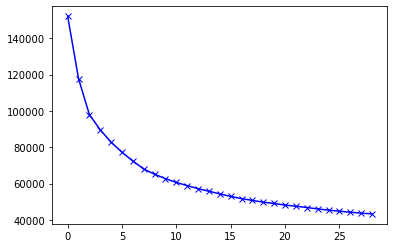

In [20]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
plt.plot(cost, 'bx-')

In [21]:
kmean= KMeans(3)
kmean.fit(X)
labels=kmean.labels_
clusters=pd.concat([df1, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,5.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
1,12.0,4.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0
2,12.0,3.0,2.0,2.0,0.0,0.0,5.0,2.0,2.0,6.0,6.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0
3,12.0,3.0,3.0,3.0,0.0,1.0,5.0,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0
4,12.0,2.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


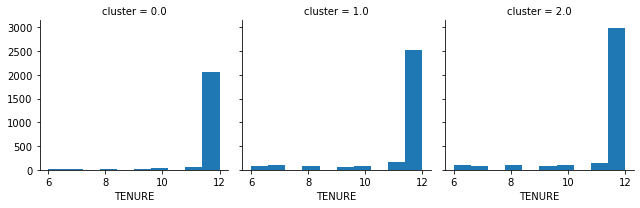

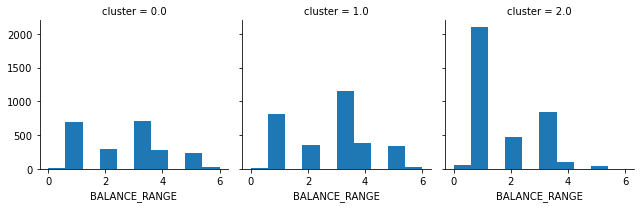

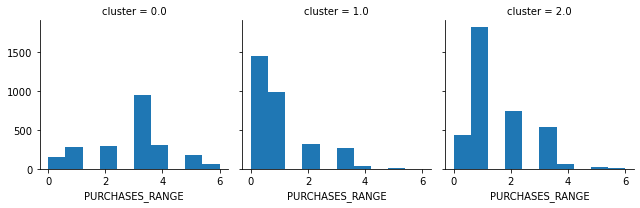

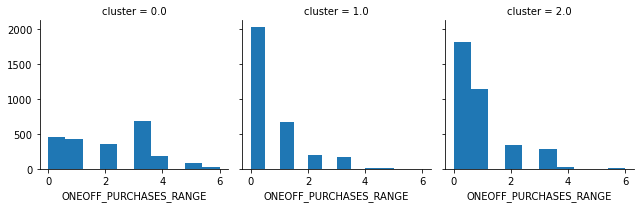

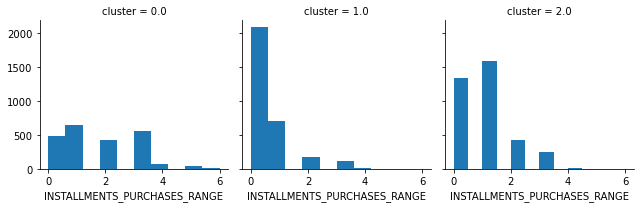

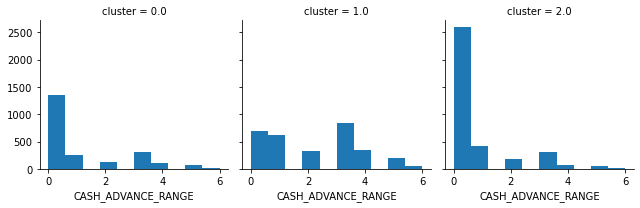

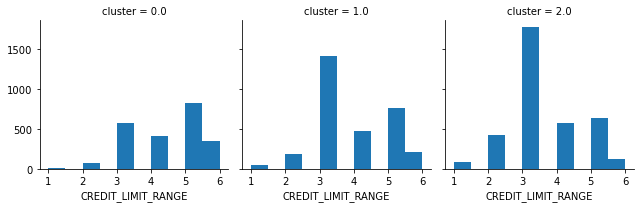

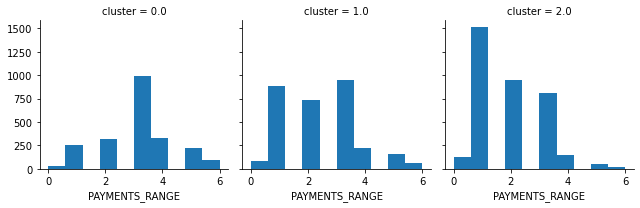

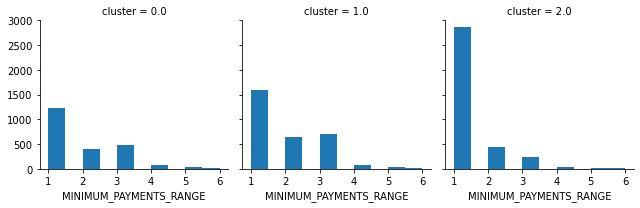

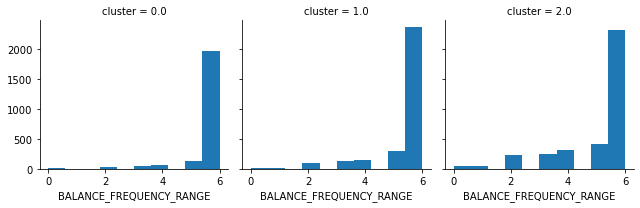

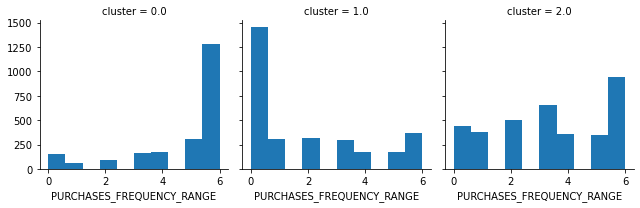

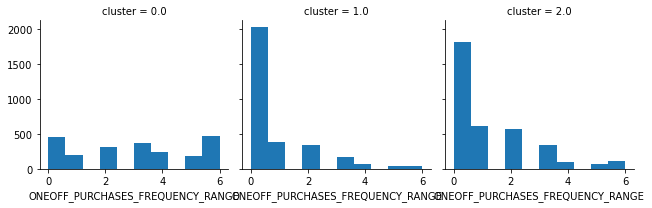

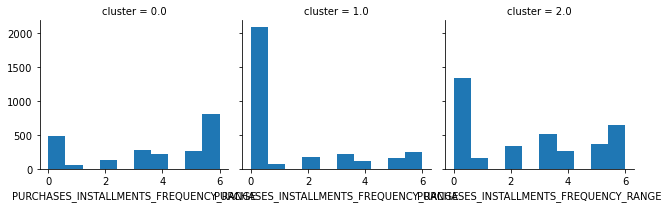

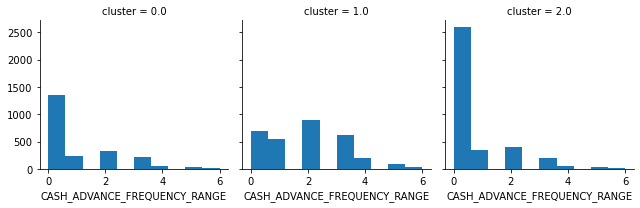

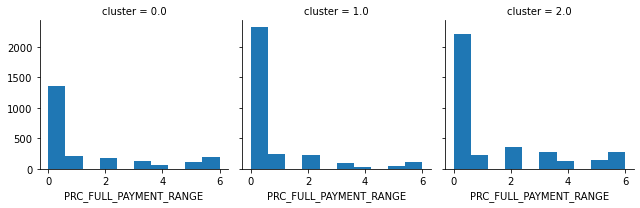

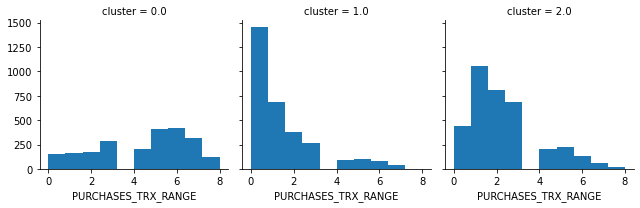

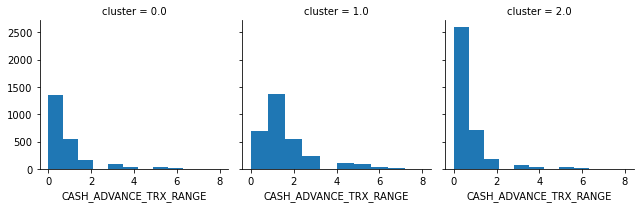

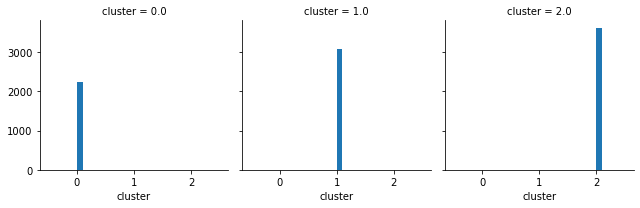

In [22]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8949, 2)

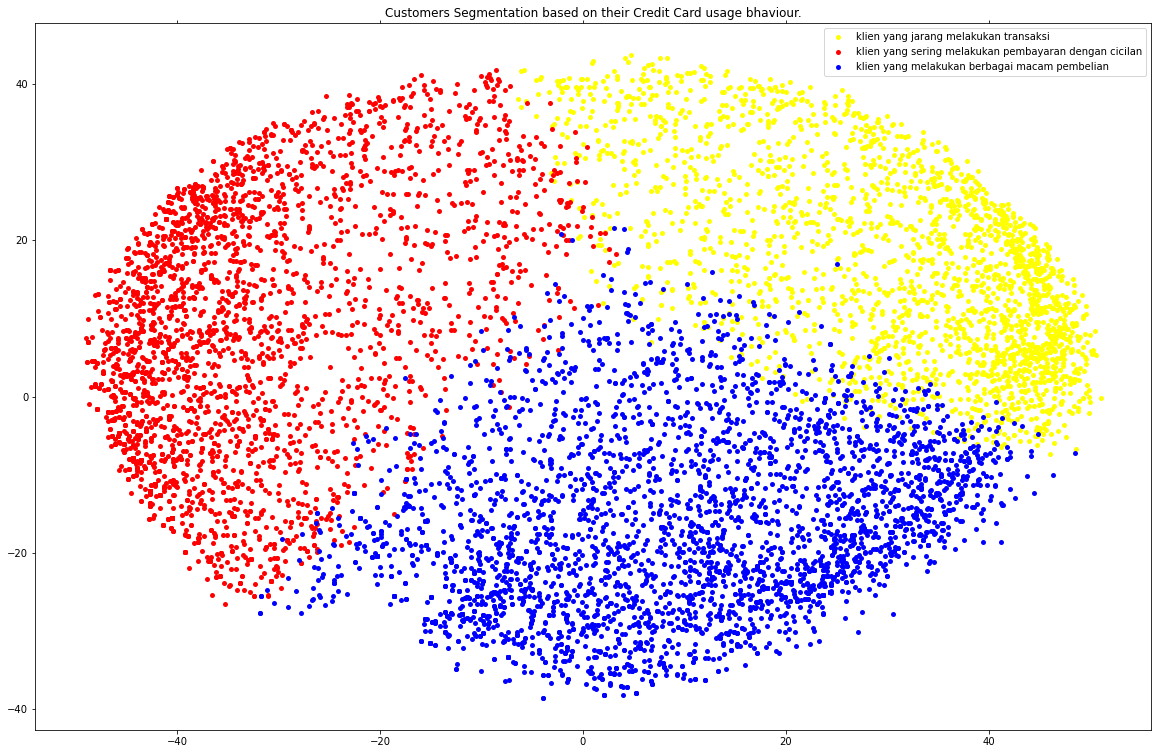

In [25]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'yellow',
          1: 'red',
          2: 'blue'}
names = {0: 'klien yang jarang melakukan transaksi', 
         1: 'klien yang sering melakukan pembayaran dengan cicilan', 
         2: 'klien yang melakukan berbagai macam pembelian'}

df2 = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df2.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label= names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()